In [77]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
from timeit import default_timer as timer
from IPython.display import HTML,display
import re
import matplotlib.pyplot as plt
import matplotlib.dates as dates

In [78]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [79]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [80]:
twitter_archive.shape

(2356, 17)

In [81]:
folder_name = 'image_pred'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name,url.split('/')[-1]), mode = 'wb') as file:
    file.write(response.content)

In [82]:
image_predictions = pd.read_csv('f:/data/data_wrangling/final_project/image_pred/image-predictions.tsv',sep='\t')

In [83]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [84]:
image_predictions.shape

(2075, 12)

In [85]:
result = pd.merge(image_predictions,twitter_archive,how = 'left' , on='tweet_id')

In [86]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      2075 non-null int64
jpg_url                       2075 non-null object
img_num                       2075 non-null int64
p1                            2075 non-null object
p1_conf                       2075 non-null float64
p1_dog                        2075 non-null bool
p2                            2075 non-null object
p2_conf                       2075 non-null float64
p2_dog                        2075 non-null bool
p3                            2075 non-null object
p3_conf                       2075 non-null float64
p3_dog                        2075 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null object
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 

In [87]:
r = result[result['retweeted_status_user_id']>=0]

In [88]:
result = result.drop(r.index,axis=0)

In [89]:
result.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [60]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2074
Data columns (total 28 columns):
tweet_id                      1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-null int64
p1                            1994 non-null object
p1_conf                       1994 non-null float64
p1_dog                        1994 non-null bool
p2                            1994 non-null object
p2_conf                       1994 non-null float64
p2_dog                        1994 non-null bool
p3                            1994 non-null object
p3_conf                       1994 non-null float64
p3_dog                        1994 non-null bool
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 n

In [61]:
image_predictions.shape

(2075, 12)

In [62]:
consumer_key = 'gRSQvKObZPwITwIrFvKfn1Io1'
consumer_secret_key = '5ia4D2RvtDGZdHI93NDPy9r7HmuknjyOeVV73gVmh4bq7Dbb7d'

access_key = '2686725732-xjTkBpEztvQgu6dw9gYIbmATORWKQzHrG5Jx07B'
access_secret_key = 'mIuDCKVgbMQmAQRC4GWEt1N1aEBkLjciD0UuPZdnJi9Cj'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_key, access_secret_key)

api = tweepy.API(auth)

In [18]:
tweet_ids = twitter_archive['tweet_id'].values
len(tweet_ids)

2356

In [11]:
import json
df_list=[]
fails_dict = {}
with open('tweet_json.txt', 'w') as outfile:
  for tweet_id in tweet_ids:
    try:
     tweet = api.get_status(tweet_id, tweet_mode='extended')
     json.dump(tweet._json, outfile)
     outfile.write('\n')
     df_list.append({'tweet_id':tweet_id,
                'retweet_count':tweet._json['retweet_count'],
                'favorite_count':tweet._json['favorite_count']})
    except tweepy.TweepError as e:
        print("fail")
        fails_dict[tweet_id] = e
        pass
df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail
fail


In [14]:
df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8259,37850
1,892177421306343426,6103,32526
2,891815181378084864,4040,24488
3,891689557279858688,8402,41203
4,891327558926688256,9108,39381
5,891087950875897856,3023,19797
6,890971913173991426,2000,11571
7,890729181411237888,18344,63871
8,890609185150312448,4160,27210
9,890240255349198849,7175,31198


In [181]:
df.to_csv('count.csv',index=False)

**ASSESSING**

In [19]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [20]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [90]:
result['doggo'].value_counts()

None     1920
doggo      74
Name: doggo, dtype: int64

In [91]:
result['floofer'].value_counts()

None       1986
floofer       8
Name: floofer, dtype: int64

In [92]:
result['pupper'].value_counts()

None      1782
pupper     212
Name: pupper, dtype: int64

In [93]:
result['puppo'].value_counts()

None     1971
puppo      23
Name: puppo, dtype: int64

In [94]:
result.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True)

In [96]:
result.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,...,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [97]:
result['tweet_id'] = result['tweet_id'].astype(str)

In [98]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [99]:
result['timestamp'] = result['timestamp'].str[:-5]

In [100]:
result['timestamp'] = pd.to_datetime(result['timestamp'])

In [101]:
result

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,...,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,...,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,...,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,...,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,...,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,...,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,...,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,...,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None


In [104]:
result = pd.melt(result, id_vars=['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name'], var_name = 'type',value_vars=['doggo','floofer','pupper','puppo'])
result.drop(['type'],inplace=True,axis=1)
result.drop_duplicates(keep='first',inplace=True)

In [105]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2311 entries, 0 to 7963
Data columns (total 9 columns):
tweet_id              2311 non-null object
timestamp             2311 non-null datetime64[ns]
source                2311 non-null object
text                  2311 non-null object
expanded_urls         2311 non-null object
rating_numerator      2311 non-null int64
rating_denominator    2311 non-null int64
name                  2311 non-null object
value                 2311 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 180.5+ KB


In [107]:
result['value'].value_counts()

None       1994
pupper      212
doggo        74
puppo        23
floofer       8
Name: value, dtype: int64

In [110]:
result=result.rename(columns={'value':'type'})

In [74]:
twitter_archive.shape

(2750, 9)

In [111]:
result['type'] = result['type'].replace('None','')

In [112]:
result = result.groupby(['tweet_id','timestamp','source','text','expanded_urls','rating_numerator','rating_denominator','name'])['type'].apply(', '.join).reset_index()

In [39]:
twitter_archive.shape

(2297, 9)

In [40]:
twitter_archive.name.value_counts()

None         686
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Lola          10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Toby           7
Bailey         7
Daisy          7
Buddy          7
an             7
Leo            6
Oscar          6
Jack           6
Milo           6
Rusty          6
Scout          6
Jax            6
Koda           6
Stanley        6
Bella          6
Dave           6
Alfie          5
            ... 
Emmie          1
Traviss        1
Geno           1
Franq          1
Aldrick        1
Griswold       1
Mac            1
Carter         1
Aqua           1
Carper         1
Kayla          1
Link           1
Alexander      1
Swagger        1
Lulu           1
Tessa          1
Severus        1
Snoop          1
Bruiser        1
Anna           1
Ulysses        1
Ben            1
Wafer          1
Liam           1
Harvey         1
Mutt           1
River          1
Reptar        

In [41]:
lit = []
def change_name(variable):
    if variable['name'][0].islower()==True:
        lit.append('None')
    else:
        lit.append(variable['name'])

twitter_archive.apply(change_name,axis=1)
twitter_archive['name'] = lit

In [42]:
twitter_archive.name.value_counts()

None          795
Charlie        12
Cooper         11
Lucy           11
Oliver         11
Penny          10
Lola           10
Tucker         10
Bo              9
Winston         9
Sadie           8
Daisy           7
Toby            7
Buddy           7
Bailey          7
Bella           6
Milo            6
Jack            6
Jax             6
Dave            6
Rusty           6
Leo             6
Koda            6
Oscar           6
Stanley         6
Scout           6
Alfie           5
Gus             5
Oakley          5
Finn            5
             ... 
Alejandro       1
Strider         1
Chuck           1
Christoper      1
Lugan           1
Sky             1
Bonaparte       1
Ralphy          1
Bobby           1
Emanuel         1
Brooks          1
Dixie           1
Flash           1
Flurpson        1
Lilli           1
Jomathan        1
Huck            1
Joey            1
Winifred        1
DayZ            1
Halo            1
Socks           1
Lassie          1
Stormy          1
Sweets    

In [43]:
twitter_archive.rating_denominator.value_counts()

10     2278
11        3
50        3
80        2
7         1
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

In [44]:
rating = twitter_archive.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)
rating

,0,1
0,8,10
1,7,10
2,9,10
3,6,10
4,5,10
5,10,10
6,2,10
7,10,10
8,9,10
9,8,10


In [45]:
twitter_archive['rating_numerator'] = rating[0]

In [46]:
twitter_archive[twitter_archive['tweet_id']==832215909146226688]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type


In [147]:
temp_den =  twitter_archive[twitter_archive.rating_denominator!=10]
temp_den.drop(['timestamp','source','expanded_urls','name','type'],axis=1,inplace=True)

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [148]:
pd.options.display.max_colwidth = 800
display(temp_den)

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


**drop '832088576586297345','835246439529840640'**

In [149]:
twitter_archive.loc[twitter_archive.tweet_id == 775096608509886464, 'rating_numerator'] = 14
twitter_archive.loc[twitter_archive.tweet_id == 775096608509886464, 'rating_denominator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 740373189193256964, 'rating_numerator'] = 14
twitter_archive.loc[twitter_archive.tweet_id == 740373189193256964, 'rating_denominator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 722974582966214656, 'rating_numerator'] = 13
twitter_archive.loc[twitter_archive.tweet_id == 722974582966214656, 'rating_denominator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twitter_archive.loc[twitter_archive.tweet_id == 716439118184652801, 'rating_denominator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twitter_archive.loc[twitter_archive.tweet_id == 716439118184652801, 'rating_denominator'] = 10

In [150]:
twitter_archive.rating_denominator.value_counts()

10     2727
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [101]:
temp = twitter_archive[twitter_archive.rating_numerator>'20']

In [104]:
temp.drop(['timestamp','source','expanded_urls','name'],axis=1,inplace=True)

C:\Users\Hp\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [105]:
pd.options.display.max_colwidth = 800
display(temp)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,NaN,NaN,NaN,420,10,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",NaN,NaN,NaN,666,10,None,None,None,None
229,848212111729840128,NaN,NaN,"This is Jerry. He's doing a distinguished tongue slip. Slightly patronizing tbh. You think you're better than us, Jerry? 6/10 hold me back https://t.co/DkOBbwulw1",NaN,NaN,NaN,6,10,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,960,0,None,None,None,None
340,832215909146226688,NaN,NaN,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,9.75,10,None,None,None,None
433,820690176645140481,NaN,NaN,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,84,70,None,None,None,None
462,817502432452313088,NaN,NaN,RT @dog_rates: Meet Herschel. He's slightly bigger than ur average pupper. Looks lonely. Could probably ride 7/10 would totally pet https:/…,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,7,10,None,None,pupper,None
485,814578408554463233,NaN,NaN,RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https:/…,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,9,10,None,None,None,None
516,810984652412424192,NaN,NaN,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,24,7,None,None,None,None
599,798682547630837760,NaN,NaN,RT @dog_rates: Here we see a rare pouched pupper. Ample storage space. Looks alert. Jumps at random. Kicked open that door. 8/10 https://t.…,6.769365e+17,4.196984e+09,2015-12-16 01:27:03 +0000,8,10,None,None,pupper,None


In [3]:
twitter_archive.loc[twitter_archive.tweet_id == 835246439529840640, 'rating_numerator'] = 13
twitter_archive.loc[twitter_archive.tweet_id == 835246439529840640, 'rating_denominator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 832215909146226688, 'rating_numerator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 832215909146226688, 'rating_denominator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 786709082849828864, 'rating_numerator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 786709082849828864, 'rating_denominator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 778027034220126208, 'rating_numerator'] = 11
twitter_archive.loc[twitter_archive.tweet_id == 778027034220126208, 'rating_denominator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 716439118184652801, 'rating_numerator'] = 11
twitter_archive.loc[twitter_archive.tweet_id == 716439118184652801, 'rating_denominator'] = 10
twitter_archive.loc[twitter_archive.tweet_id == 680494726643068929, 'rating_numerator'] = 11
twitter_archive.loc[twitter_archive.tweet_id == 680494726643068929, 'rating_denominator'] = 10

NameError: name 'twitter_archive' is not defined

In [155]:
pd.options.display.max_colwidth = 50
display(twitter_archive)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [ ]:
df = df.groupby(['Name','Sid','Revenue'])['Use_Case'].apply(', '.join).reset_index()

In [156]:
twitter_archive.shape

(2750, 9)

**Assessing other 2 tables**

In [157]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [158]:
image_predictions['p1'] = image_predictions.p1.str.capitalize()
image_predictions['p2'] = image_predictions.p2.str.capitalize()
image_predictions['p3'] = image_predictions.p3.str.capitalize()

In [159]:
image_predictions.rename(columns={'p1':'First_most_likely',
                                 'p2':'Second_most_likely',
                                 'p3':'Third_most_likely'},inplace=True)

In [160]:
image_predictions

,tweet_id,jpg_url,img_num,First_most_likely,p1_conf,p1_dog,Second_most_likely,p2_conf,p2_dog,Third_most_likely,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,Collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_swiss_mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Box_turtle,0.933012,False,Mud_turtle,0.045885,False,Terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517,True,Tibetan_mastiff,0.058279,True,Fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Shopping_cart,0.962465,False,Shopping_basket,0.014594,False,Golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature_poodle,0.201493,True,Komondor,0.192305,True,Soft-coated_wheaten_terrier,0.082086,True


In [161]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2075 non-null int64
jpg_url               2075 non-null object
img_num               2075 non-null int64
First_most_likely     2075 non-null object
p1_conf               2075 non-null float64
p1_dog                2075 non-null bool
Second_most_likely    2075 non-null object
p2_conf               2075 non-null float64
p2_dog                2075 non-null bool
Third_most_likely     2075 non-null object
p3_conf               2075 non-null float64
p3_dog                2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [162]:
image_predictions['tweet_id'] = image_predictions['tweet_id'].astype(str)

In [163]:
image_predictions.describe()

,img_num,p1_conf,p2_conf,p3_conf
count,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,1.203855,0.594548,1.345886e-01,6.032417e-02
std,0.561875,0.271174,1.006657e-01,5.090593e-02
min,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,1.000000,0.843855,1.955655e-01,9.180755e-02
max,4.000000,1.000000,4.880140e-01,2.734190e-01


In [164]:
image_predictions.shape

(2075, 12)

 ** Assessing **

In [182]:
df_count = pd.read_csv('count.csv')

In [2]:
df_count['tweet_id'] = df_count['tweet_id'].astype(str)
df_count.info()

NameError: name 'df_count' is not defined

In [166]:
result = pd.merge(twitter_archive,image_predictions , on='tweet_id')

In [167]:
result.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,img_num,First_most_likely,p1_conf,p1_dog,Second_most_likely,p2_conf,p2_dog,Third_most_likely,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_towel,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [102]:
result.query('name=="Cassie"')['tweet_id'].value_counts()

890240255349198849    2
697943111201378304    1
797545162159308800    1
707297311098011648    1
Name: tweet_id, dtype: int64

In [191]:
result.query('tweet_id=="890240255349198849"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,img_num,First_most_likely,p1_conf,p1_dog,Second_most_likely,p2_conf,p2_dog,Third_most_likely,p3_conf,p3_dog
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
10,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,None,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [184]:
final_result = pd.merge(result,df_count , on='tweet_id')

In [185]:
final_result

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,...,p1_conf,p1_dog,Second_most_likely,p2_conf,p2_dog,Third_most_likely,p3_conf,p3_dog,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,...,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False,8259,37850
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,...,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True,6103,32526
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,...,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True,4040,24488
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,...,0.170278,False,Labrador_retriever,0.168086,True,Spatula,0.040836,False,8402,41203
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9108,39381
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,...,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3023,19797
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,...,0.341703,True,Border_collie,0.199287,True,Ice_lolly,0.193548,False,2000,11571
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,...,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,18344,63871
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,...,0.487574,True,Irish_setter,0.193054,True,Chesapeake_bay_retriever,0.118184,True,4160,27210
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7175,31198


In [186]:
final_result.query('tweet_id=="775898661951791106"')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,type,jpg_url,...,p1_conf,p1_dog,Second_most_likely,p2_conf,p2_dog,Third_most_likely,p3_conf,p3_dog,retweet_count,favorite_count
737,775898661951791106,2016-09-14 03:27:11,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",https://twitter.com/dog_rates/status/733109485...,12,10,None,doggo,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,...,0.945523,True,Labrador_retriever,0.042319,True,Doormat,0.003956,False,17792,0
738,775898661951791106,2016-09-14 03:27:11,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",https://twitter.com/dog_rates/status/733109485...,12,10,None,None,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,...,0.945523,True,Labrador_retriever,0.042319,True,Doormat,0.003956,False,17792,0
739,775898661951791106,2016-09-14 03:27:11,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Like father (doggo), like son (...",https://twitter.com/dog_rates/status/733109485...,12,10,None,pupper,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,...,0.945523,True,Labrador_retriever,0.042319,True,Doormat,0.003956,False,17792,0


In [114]:
image_predictions.query('tweet_id=="775898661951791106"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1446,775898661951791106,https://pbs.twimg.com/media/CiyHLocU4AI2pJu.jpg,1,golden_retriever,0.945523,True,Labrador_retriever,0.042319,True,doormat,0.003956,False


**Results**

In [198]:
no_types = final_result['type'].value_counts()

In [201]:
no_types.drop('None',inplace=True)

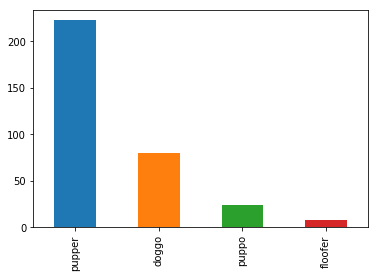

In [202]:
no_types.plot(kind='bar')

In [272]:
max_breeds = final_result.query('p1_dog==True')\
.groupby(['First_most_likely']).count()['tweet_id'].sort_values(ascending=False)[:10]

In [273]:
max_breeds

First_most_likely
Golden_retriever      191
Labrador_retriever    115
Pembroke               99
Chihuahua              88
Pug                    65
Samoyed                48
Chow                   47
Pomeranian             46
Toy_poodle             44
Cocker_spaniel         35
Name: tweet_id, dtype: int64

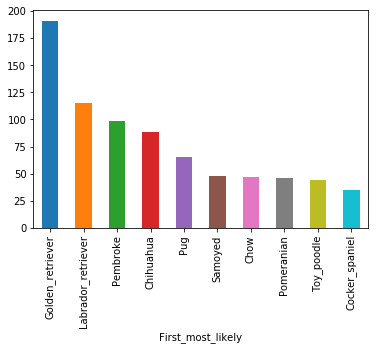

In [274]:
max_breeds.plot(kind='bar')

In [238]:
d = dates.date2num(final_result.timestamp)

(0, 16000)

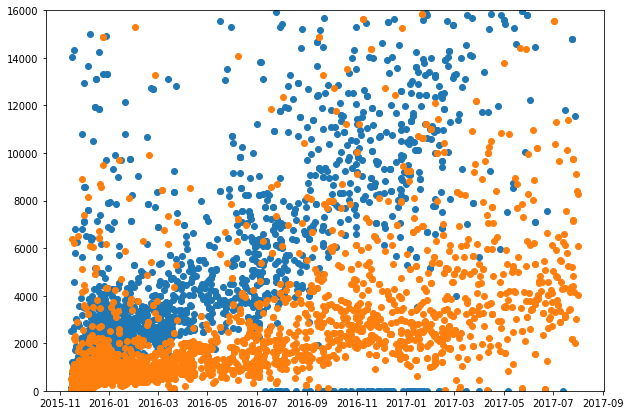

In [277]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot_date(d,final_result.favorite_count)
ax.plot_date(d,final_result.retweet_count)
ax.set_ylim([0,16000])

In [280]:
doggo_mean = final_result.query('type=="doggo"')['favorite_count'].mean()
floofer_mean = final_result.query('type=="floofer"')['favorite_count'].mean()
pupper_mean=final_result.query('type=="pupper"')['favorite_count'].mean()
puppo_mean = final_result.query('type=="puppo"')['favorite_count'].mean()

In [295]:
list = [doggo_mean,floofer_mean,pupper_mean,puppo_mean]
type = ['doggo','floofler','pupper','puppo']

<BarContainer object of 4 artists>

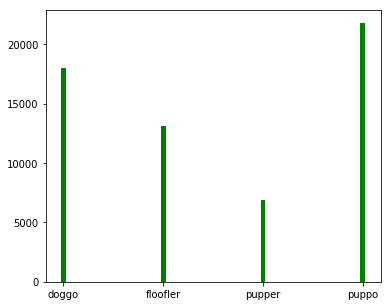

In [299]:
width = 0.05

fig, ax = plt.subplots(figsize=(6,5))

ax.bar(type,list,width,color = 'green')